### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-25,420967,4159800,610681,549924,238424,129446,127949,151352,111806,91534,81221,118868,88800,4848,195890
2021-07-26,421382,4167672,610952,550502,238595,129460,127971,152069,111851,91573,81268,119182,89122,4848,195973
2021-07-27,422022,4177694,611414,551835,239079,129591,127995,152836,111883,91592,81323,119482,89479,4848,196058
2021-07-28,422662,4187379,611801,553179,239616,129718,128010,153620,111923,91709,81396,119801,89782,4848,196138
2021-07-29,423217,4198939,612122,554497,239997,129809,128029,154404,111951,91622,81442,120126,90074,4848,196214


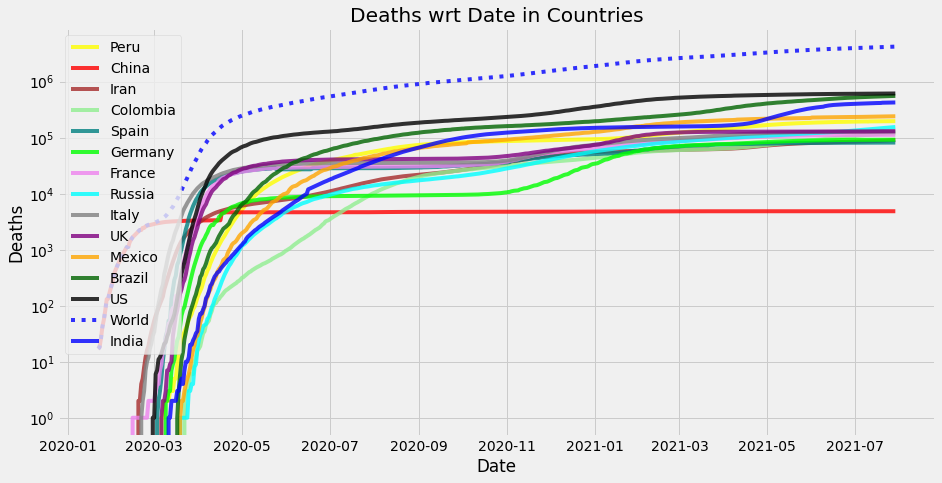

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-25,39361,438981,16008,18129,6535,28937,4742,23517,15242,1149,0,11048,27146,80,1490
2021-07-26,29689,537351,89096,18999,5920,24932,3115,22678,5414,1423,61625,8503,31814,71,611
2021-07-27,43654,615950,70740,41411,17408,23401,4516,22486,27128,2060,26399,11426,34951,87,1366
2021-07-28,43509,636637,68771,48013,19028,25713,5693,21870,27923,10735,27149,9364,33817,50,1502
2021-07-29,44230,658221,78170,42283,19223,30871,6167,22720,25429,-4910,26689,9690,34433,68,722


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-25,47408,482093,33211,47997,9304,33468,2774,22491,10249,1376,17166,18816,19206,36,2123
2021-07-26,46227,485777,36936,46064,9079,32899,2797,22504,9927,1379,20130,18128,20046,38,2022
2021-07-27,46055,494455,39190,45753,9634,32265,2912,22503,11074,1424,20548,17681,21040,41,1979
2021-07-28,45886,503934,41162,45904,10260,31829,3097,22460,12197,2045,20988,17127,21892,42,1947
2021-07-29,45775,514220,43629,45663,10858,31765,3302,22478,13079,1581,21368,16631,22728,44,1865


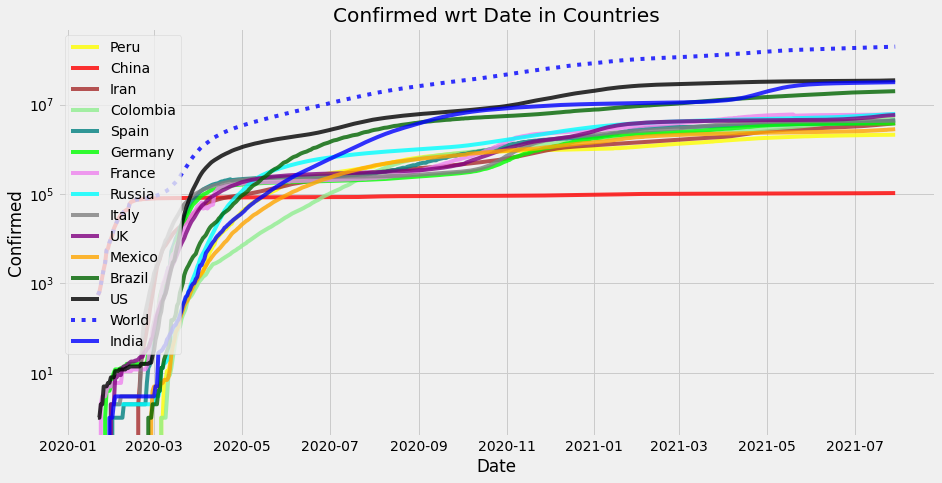

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-25,416,6961,56,476,108,28,7,769,6,3,0,330,268,0,95
2021-07-26,415,7872,271,578,171,14,22,717,45,39,47,314,322,0,83
2021-07-27,640,10022,462,1333,484,131,24,767,32,19,55,300,357,0,85
2021-07-28,640,9685,387,1344,537,127,15,784,40,117,73,319,303,0,80
2021-07-29,555,11560,321,1318,381,91,19,784,28,-87,46,325,292,0,76


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-25,841.54,8852.66,243.99,1158.76,256.63,53.32,13.05,754.76,20.14,21.36,14.25,425.47,211.50,-0.03,122.83
2021-07-26,788.22,8730.08,247.36,1086.16,245.93,48.40,14.17,750.04,23.25,23.57,18.35,411.54,225.31,-0.03,117.85
2021-07-27,769.69,8891.57,274.19,1117.02,275.69,58.73,15.40,752.16,24.34,23.00,22.93,397.60,241.78,-0.02,113.74
2021-07-28,753.48,8990.75,288.29,1145.39,308.35,67.26,15.35,756.14,26.30,34.75,29.19,387.77,249.43,-0.02,109.53
2021-07-29,728.67,9311.91,292.38,1166.97,317.43,70.23,15.80,759.62,26.51,19.53,31.29,379.92,254.75,-0.02,105.34


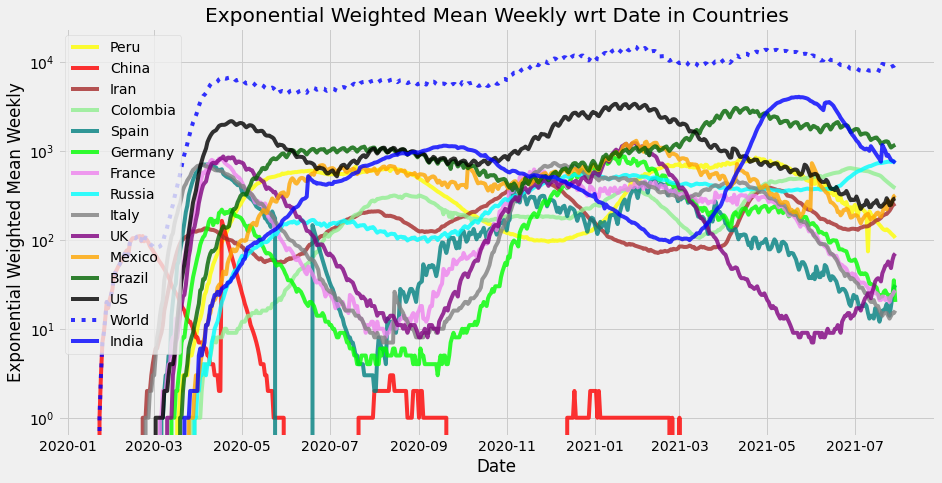

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

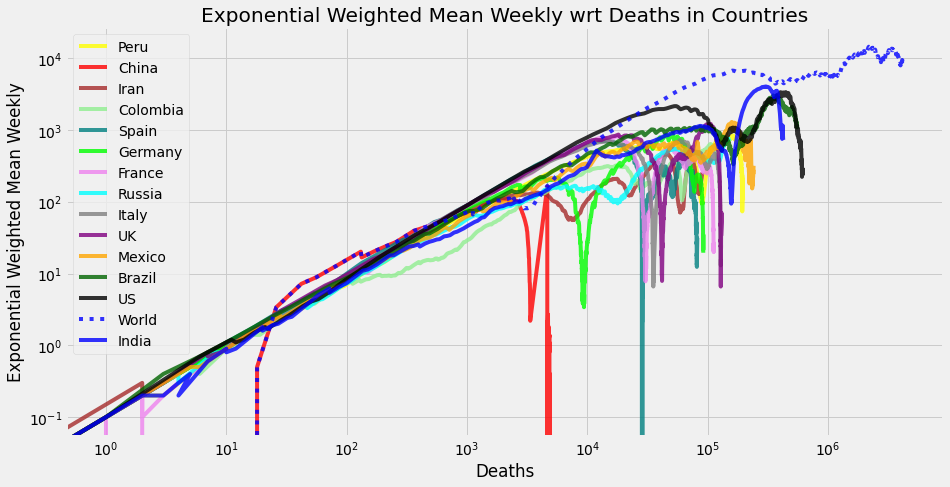

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

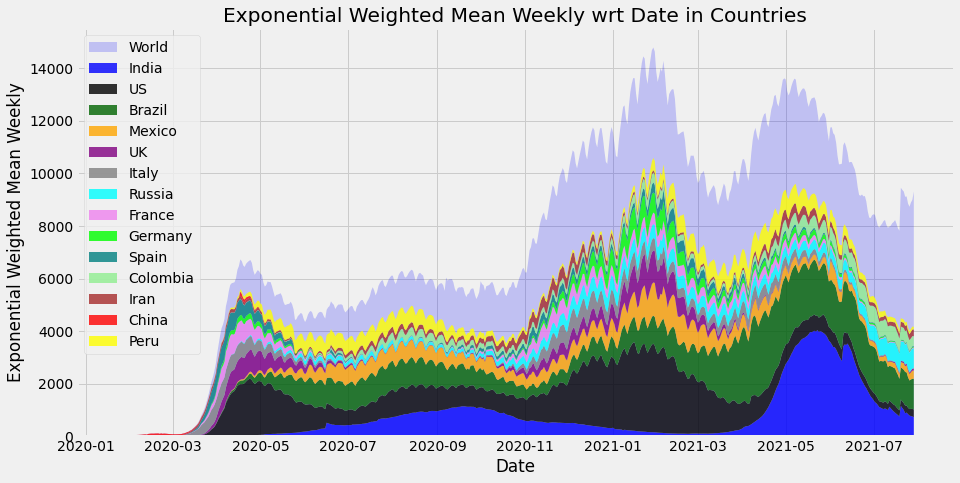

In [20]:
stackplotter(AVG, name)

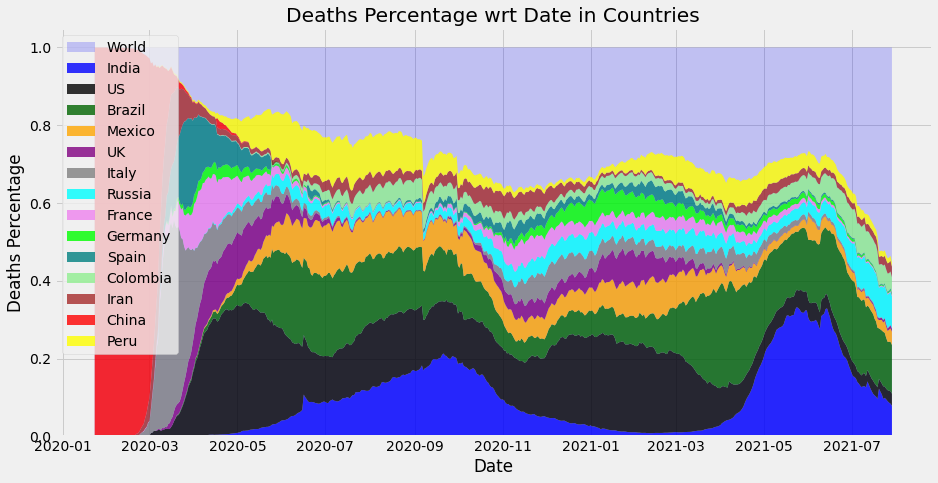

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

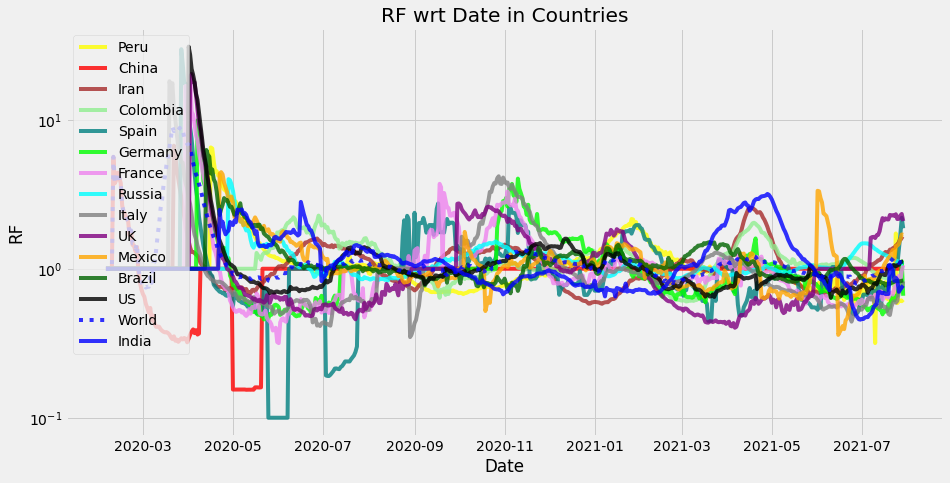

In [23]:
plotter(Reproductivity, 'RF')

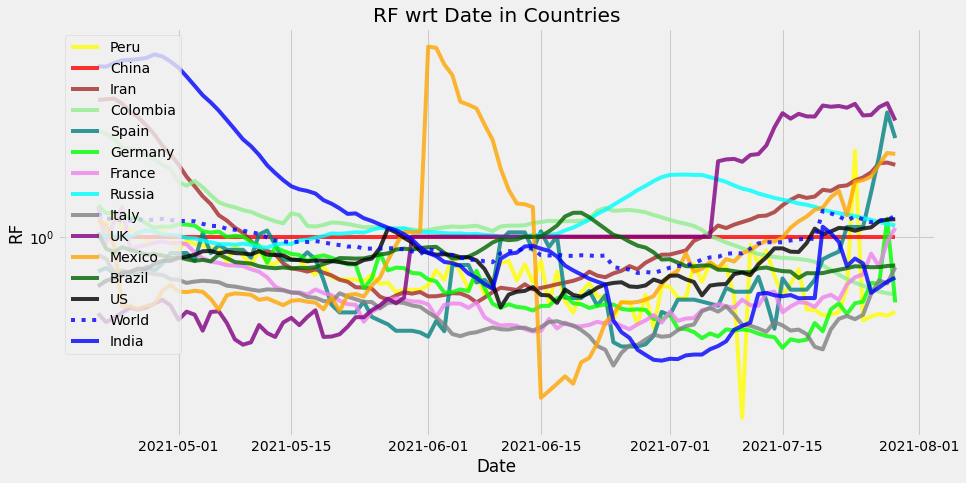

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

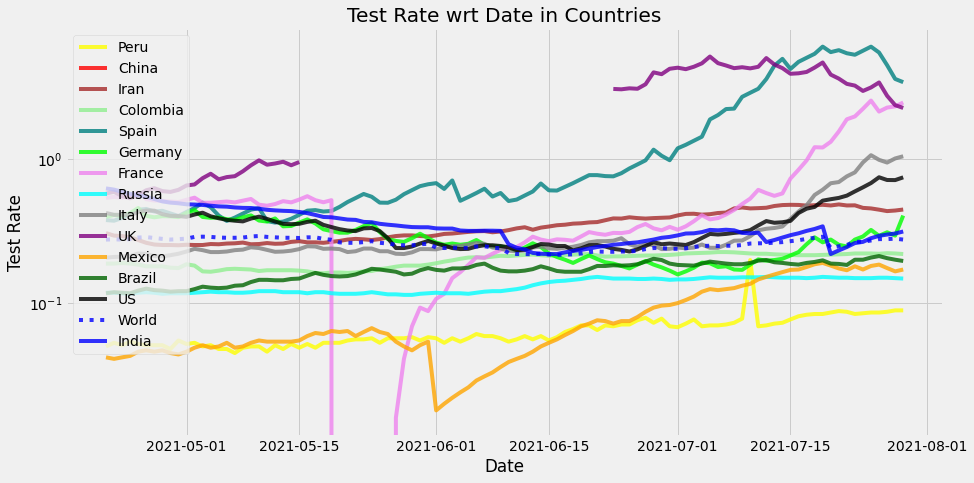

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

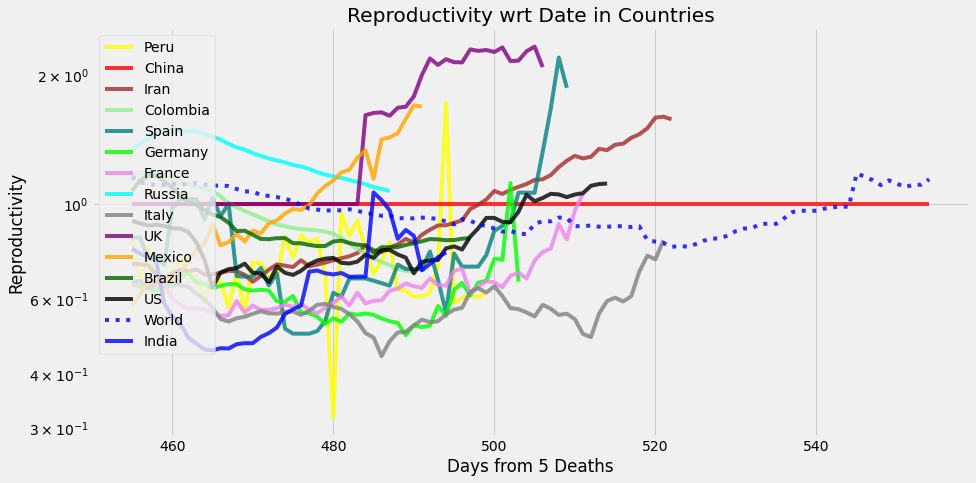

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

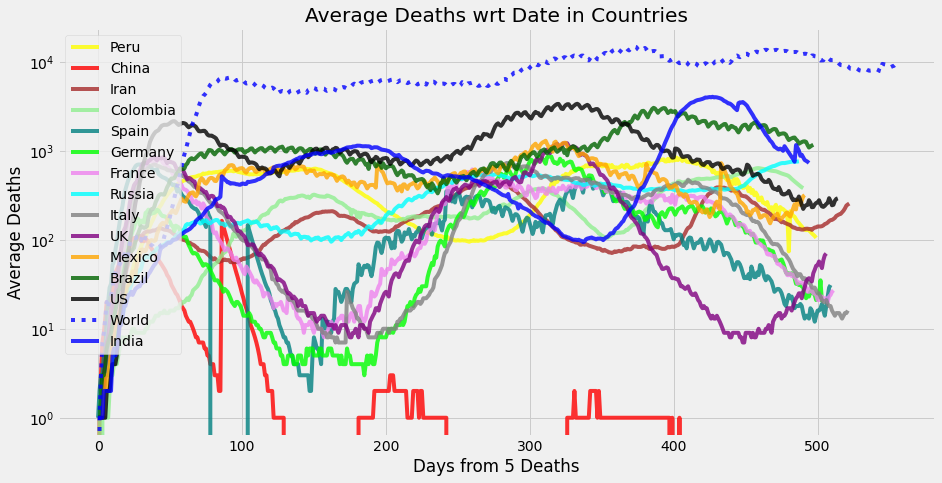

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

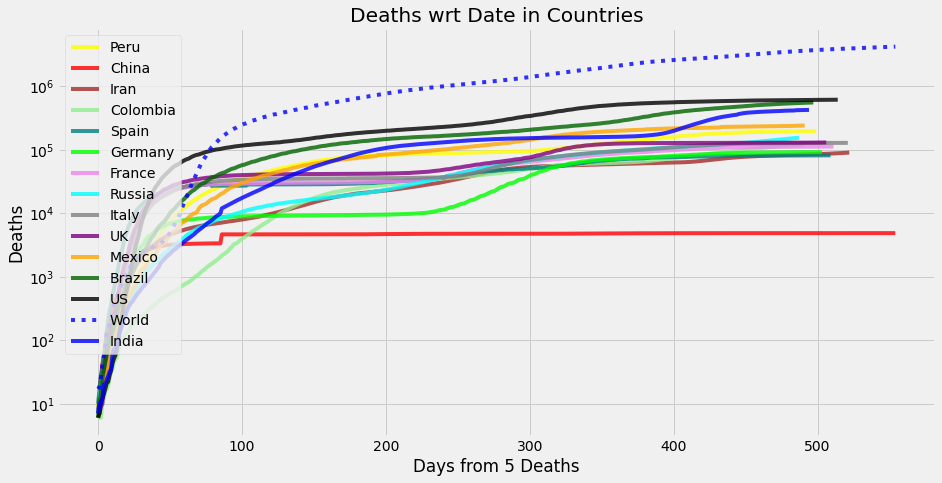

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4198939,11560,9003.29,9311.91,1.1425,196626531,0.276,514220,839.79
US,612122,321,305.29,292.38,1.1166,34750860,0.746,43629,122.42
Brazil,554497,1318,1068.71,1166.97,0.8330,19839369,0.196,45663,110.90
India,423217,555,535.29,728.67,0.7711,31572344,0.314,45775,84.64
Mexico,239997,381,338.71,317.43,1.6899,2810097,0.171,10858,48.00
Peru,196214,76,95.29,105.34,0.6203,2108595,0.089,1865,39.24
Russia,154404,784,770.29,759.62,1.0736,6138969,0.148,22478,30.88
UK,129809,91,77.57,70.23,2.0889,5828316,2.261,31765,25.96
Italy,128029,19,15.57,15.80,0.8229,4336906,1.045,3302,25.61


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4198939,11560,9003.29,9311.91,1.1425,196626531,0.276,514220,839.79
Indonesia,90552,1893,1645.71,1460.64,1.8384,3331206,0.130,38028,18.11
Brazil,554497,1318,1068.71,1166.97,0.8330,19839369,0.196,45663,110.90
Russia,154404,784,770.29,759.62,1.0736,6138969,0.148,22478,30.88
India,423217,555,535.29,728.67,0.7711,31572344,0.314,45775,84.64
South Africa,71431,1093,400.86,408.48,1.1805,2422151,0.165,13439,14.29
Burma,8552,342,345.57,286.80,3.5899,289333,0.077,4408,1.71
Mexico,239997,381,338.71,317.43,1.6899,2810097,0.171,10858,48.00
Colombia,120126,325,327.14,379.92,0.6937,4766829,0.219,16631,24.03


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4198939


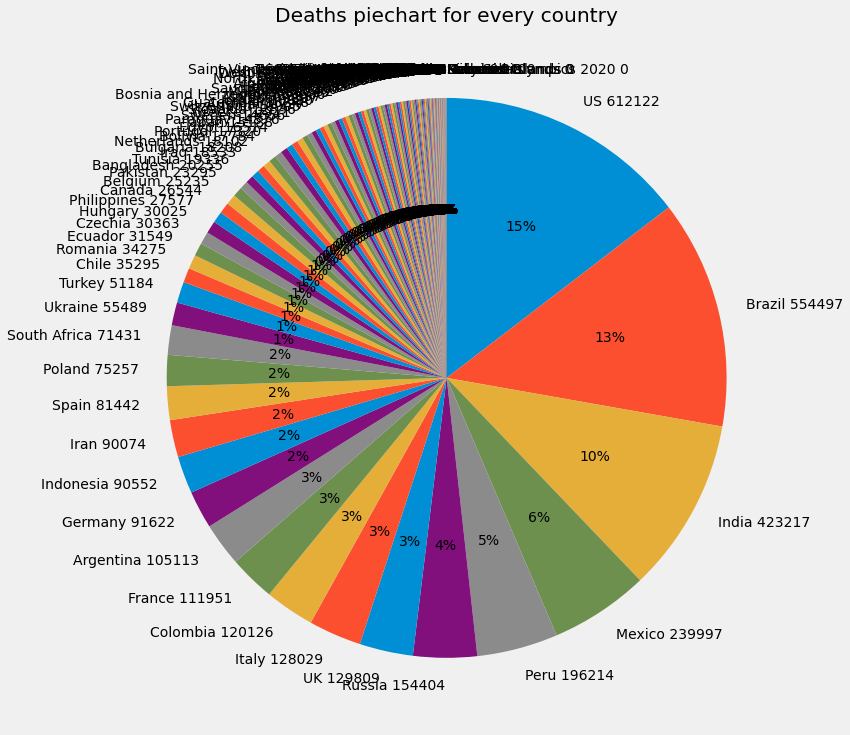

In [35]:
piechart('Deaths')

World total:  9003


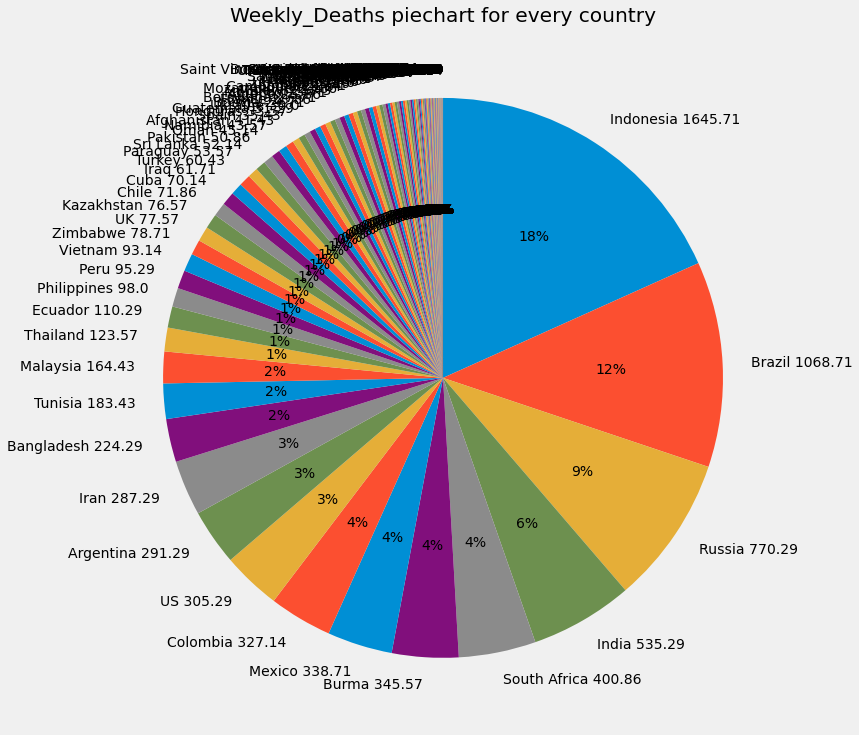

In [36]:
piechart('Weekly_Deaths')

World total:  11560


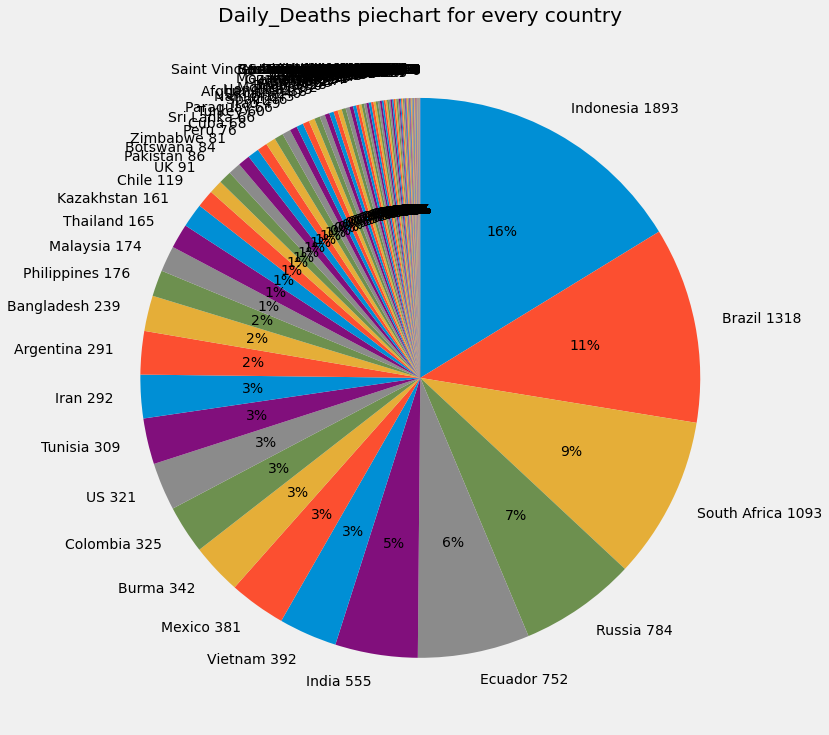

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-30


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

839787800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 128dc9e] `date` update
 1 file changed, 1522 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (82%)


To https://github.com/Arrowheadahp/COVID-19.git
   cae65cf..128dc9e  master -> master
